# Lab 2: Hand Gesture Recognition - [71pt]

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Name : Alvin Pane [1004281118]

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean dataset is never this easy. Often, more than half the work in applying machine
learning algorithms is spent finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection:

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [61 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

## Part B.1 Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html) 

In [10]:
#Load Imports
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import torch.optim as optim
import time


import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np

np.random.seed(5)


In [ ]:
#There are 102 hands in total, and we need some of these to be held out for testing. Thus we will designate hands #82 - #102 as test set hands
#and will manually seperate them into a test set folder. This represents approximately 20% of all the hands. Since the number of pictures per hand
#per letter varies, we will calculate the size of the datasets after loading. 

In [108]:

def load_data(batch_size, train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset',test_root="C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\test"):
    # Define the transformations to apply to the images
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    #LOAD TRAINING
    # Load the training dataset using ImageFolder
    dataset = torchvision.datasets.ImageFolder(root=train_root, transform=transform)

    # Split the dataset into training and validation sets
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Use DataLoader to load the data in batches
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) #64 image per batch
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    #LOAD TEST

    # Load the test dataset using ImageFolder
    test_dataset = torchvision.datasets.ImageFolder(test_root, transform=transform)

    # Use DataLoader to load the data in batches
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

In [109]:
train_loader, val_loader, test_loader = load_data(batch_size=1)

print(len(train_loader.dataset))
print(len(test_loader.dataset))
print(len(val_loader.dataset))

1523
527
381


In [ ]:
#thus there 1523 images in the training set, 527 images in the test set and 381 images in the validation set

## Part B.2 Model Building and Sanity Checking [9 pt]

### Part B.2.a Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [212]:
print('''EXPLANATION OF MODEL:

The chosen model has two convolutional layers, followed by two max-pooling layers, and two fully connected layers. The two convolutional layers have 32 and 64 filters, respectively, with a kernel size of 3, stride of 1, and padding of 1. The activation function used is ReLU, which is a common choice for CNNs. The two max-pooling layers use a kernel size of 2 and a stride of 2 to reduce the spatial dimensions of the feature mappings.

The two fully connected layers have 1024 and 9 hidden units. The first fully connected layer takes as input the flattened output of the second max-pooling layer, which has a size of 64 x 56 x 56. A dropout layer is applied before the first fully connected layer with a rate of 0.5, which helps prevent overfitting.

Overall, this architecture is well-suited for the hand gesture recognition task, as it is able to extract relevant features from the input images using convolutional layers and then classify the gestures using fully connected layers. The dropout layer also helps to prevent overfitting by randomly dropping out some of the features during training.''')

EXPLANATION OF MODEL:

The chosen model has two convolutional layers, followed by two max-pooling layers, and two fully connected layers. The two convolutional layers have 32 and 64 filters, respectively, with a kernel size of 3, stride of 1, and padding of 1. The activation function used is ReLU, which is a common choice for CNNs. The two max-pooling layers use a kernel size of 2 and a stride of 2 to reduce the spatial dimensions of the feature mappings.

The two fully connected layers have 1024 and 9 hidden units. The first fully connected layer takes as input the flattened output of the second max-pooling layer, which has a size of 64 x 56 x 56. A dropout layer is applied before the first fully connected layer with a rate of 0.5, which helps prevent overfitting.

Overall, this architecture is well-suited for the hand gesture recognition task, as it is able to extract relevant features from the input images using convolutional layers and then classify the gestures using fully connect

In [169]:

# Create the neural network model
class GestureRecognitionModel(nn.Module):
    def __init__(self,dropout_rate=0.5):
        super(GestureRecognitionModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 9)
        self.name = 'GestureR1'
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 56 * 56)
        x = self.dropout(x)
        x = self.fc1(x)
        #x = self.dropout(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


# Create the neural network model with diff dropout rate
class GestureRecognitionModel025(nn.Module):
    def __init__(self,dropout_rate=0.25):
        super(GestureRecognitionModel025, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 9)
        self.name = 'GestureR1'
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 56 * 56)
        x = self.dropout(x)
        x = self.fc1(x)
        #x = self.dropout(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Create the neural network model
class GestureRecognitionModel015(nn.Module):
    def __init__(self,dropout_rate=0.15):
        super(GestureRecognitionModel015, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 56 * 56, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 9)
        self.name = 'GestureR1'
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 56 * 56)
        x = self.dropout(x)
        x = self.fc1(x)
        #x = self.dropout(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


### Part B.2.b Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [43]:
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        #labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #corr = (outputs > 0.0).squeeze().long() != labels
        _, predicted = torch.max(outputs.data, 1)
        corr = (predicted == labels).sum().item()
        total_err += int(corr)
        total_loss += loss.item()
        total_epoch += len(labels)
    acc = 100* float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return acc, loss
    
def train_net(model,train_root,num_epochs, batch_size=64,learning_rate=0.01,momentum=0.9):
    #transform = transforms.Compose([
    #    transforms.Resize((224, 224)),
    #    transforms.ToTensor(),
    #    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    #])
    # Load the training data
    #train_dataset = torchvision.datasets.ImageFolder(root, transform=transform)
    #train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    #val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    #test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    torch.manual_seed(1000)
    train_loader, val_loader, test_loader = load_data(batch_size=batch_size,train_root=train_root)

    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    # Create the model, loss function and optimizer
    #model = GestureRecognitionModel()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    start_time=time.time()
    # Train the model
    num_epochs = num_epochs
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_train = 0
        correct_train = 0
        total_epoch = 0
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            total_epoch += len(labels)
        
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        train_accuracy = 100 * correct_train / total_train
        train_acc[epoch] = train_accuracy
        train_loss[epoch] = running_loss
        val_err[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion)
        
        #########################
        print(("Epoch {}: Train Accuracy: {}, Train loss: {} |"+
               "Validation Accuracy: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_accuracy,
                   running_loss,
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [1]:
########################################

#explain optimizer and loss function

print('''I selected the cross entropy loss function as it is appropriate for this type of problem, where we want to identify which of the 9 classes an image belongs

Stochastic gradient descent was selected as the optimizer with an appropriately tuned learning rate. SGD is advantageous because it has a faster convergence rate than other optimization algorithms and avoids getting stuck in local minima. SGD can also generalize well, which means it can avoid overfitting on the training data by regularizing the model parameters during training.''')


I selected the cross entropy loss function as it is appropriate for this type of problem, where we want to identify which of the 9 classes an image belongs

Stochastic gradient descent was selected as the optimizer with an appropriately tuned learning rate. SGD is advantageous because it has a faster convergence rate than other optimization algorithms and avoids getting stuck in local minima. SGD can also generalize well, which means it can avoid overfitting on the training data by regularizing the model parameters during training.


### Part B.2.c “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [161]:
GestureNet = GestureRecognitionModel025()
root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Gesture Images Resized'


train_net(GestureNet,train_root=root,num_epochs=20, batch_size=27,learning_rate=0.01,momentum=0.9) #dropout = 0.5


Epoch 1: Train Accuracy: 4.761904761904762, Train loss: 2.191990852355957 |Validation Accuracy: 0.0, Validation loss: 2.2499959468841553
Epoch 2: Train Accuracy: 14.285714285714286, Train loss: 2.147259473800659 |Validation Accuracy: 0.0, Validation loss: 2.3347039222717285
Epoch 3: Train Accuracy: 14.285714285714286, Train loss: 2.0916385650634766 |Validation Accuracy: 0.0, Validation loss: 2.459190845489502
Epoch 4: Train Accuracy: 14.285714285714286, Train loss: 2.0283493995666504 |Validation Accuracy: 0.0, Validation loss: 2.5914156436920166
Epoch 5: Train Accuracy: 14.285714285714286, Train loss: 1.961742639541626 |Validation Accuracy: 0.0, Validation loss: 2.6866109371185303
Epoch 6: Train Accuracy: 19.047619047619047, Train loss: 1.8807786703109741 |Validation Accuracy: 0.0, Validation loss: 2.64896297454834
Epoch 7: Train Accuracy: 57.142857142857146, Train loss: 1.7561850547790527 |Validation Accuracy: 0.0, Validation loss: 2.5386688709259033
Epoch 8: Train Accuracy: 66.666666

In [213]:
print('''Above we can see a training accuracy of 100.0 confirming our overfit on small test set''')

Above we can see a training accuracy of 100.0 confirming our overfit on small test set


## Part B.3 Hyperparameter Search [13 pt]

### Part B.3.a - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In [2]:


print('''Learning rate: This is the step size that the optimizer uses to update the model parameters. Too high a learning rate can cause the model to oscillate or converge slowly, while too low a learning rate can cause the model to converge too slowly or get stuck in a local minimum.

Dropout rate: This is a hyperparameter related to the model architecture. The dropout rate is a hyperparameter that determines the probability of dropping out each neuron in the network. A higher dropout rate means that more neurons are being dropped out during training, which can increase the model's ability to generalize, but may also lead to slower convergence during training.

Batch size: This determines the number of training examples used in each iteration of the training loop. Too small a batch size can result in a high variance in the model's gradients, while too large a batch size can result in a high computational cost and slow convergence.''')

Learning rate: This is the step size that the optimizer uses to update the model parameters. Too high a learning rate can cause the model to oscillate or converge slowly, while too low a learning rate can cause the model to converge too slowly or get stuck in a local minimum.

Dropout rate: This is a hyperparameter related to the model architecture. The dropout rate is a hyperparameter that determines the probability of dropping out each neuron in the network. A higher dropout rate means that more neurons are being dropped out during training, which can increase the model's ability to generalize, but may also lead to slower convergence during training.

Batch size: This determines the number of training examples used in each iteration of the training loop. Too small a batch size can result in a high variance in the model's gradients, while too large a batch size can result in a high computational cost and slow convergence.


### Part B.3.b - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [141]:
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_acc.csv".format(path))
    val_err = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Accuracy")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [3]:
print('NOTE: in the subsequent sections we will track test accuracy, the inverse of test error. This is a decision made simply for convenience')

NOTE: in the subsequent sections we will track test accuracy, the inverse of test error. This is a decision made simply for convenience


In [162]:
#Perform tuning 1, we'll take the default parameters from lab 1 to start, also with our dropout rate of 0.5
GestureNet = GestureRecognitionModel()
# Initialize the model and move it to GPU if available
model = GestureRecognitionModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset'
train_net(model,train_root,num_epochs=20, batch_size=64,learning_rate=0.01,momentum=0.9)


Epoch 1: Train Accuracy: 24.885095206828627, Train loss: 47.84323847293854 |Validation Accuracy: 38.32020997375328, Validation loss: 1.6889755328496296
Epoch 2: Train Accuracy: 56.07353906762968, Train loss: 30.65629744529724 |Validation Accuracy: 58.53018372703412, Validation loss: 1.2575857142607372
Epoch 3: Train Accuracy: 67.03873933026921, Train loss: 23.97737604379654 |Validation Accuracy: 56.955380577427825, Validation loss: 1.1749436855316162
Epoch 4: Train Accuracy: 73.99868680236375, Train loss: 19.372840762138367 |Validation Accuracy: 64.82939632545931, Validation loss: 1.0507195790608723
Epoch 5: Train Accuracy: 76.03414313854235, Train loss: 16.775149941444397 |Validation Accuracy: 64.30446194225722, Validation loss: 1.0841599802176158
Epoch 6: Train Accuracy: 79.25147734734078, Train loss: 14.008459955453873 |Validation Accuracy: 64.82939632545931, Validation loss: 1.0265085796515148
Epoch 7: Train Accuracy: 83.38804990151017, Train loss: 11.149573296308517 |Validation Ac

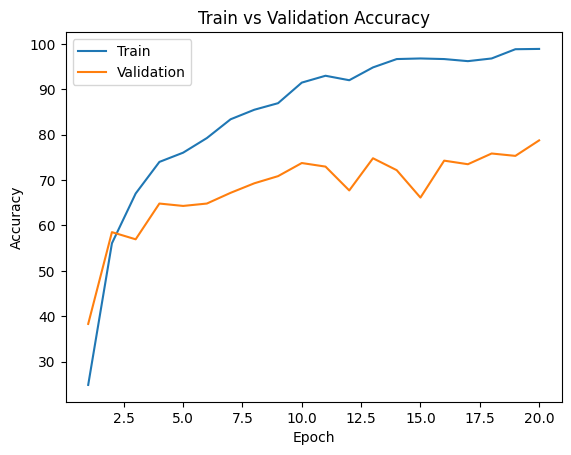

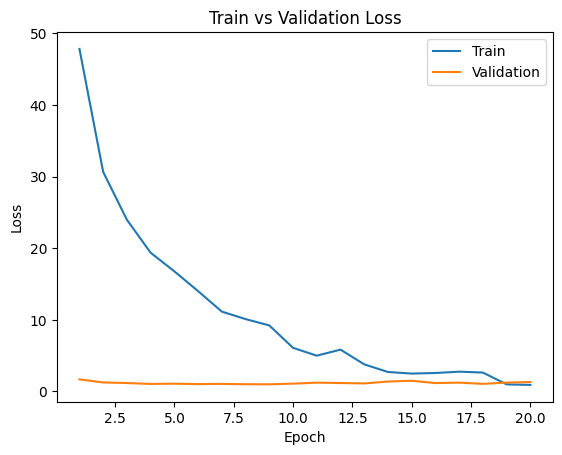

In [163]:
model_path = get_model_name(GestureNet.name, batch_size=64, learning_rate=0.01, epoch=19) #dropout 0.5
plot_training_curve(model_path)

In [164]:
#lets try increasing batch size to reduce overfit

#perform tuning 2
model = GestureRecognitionModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset'
train_net(model,train_root,num_epochs=20, batch_size=512,learning_rate=0.01,momentum=0.9)


Epoch 1: Train Accuracy: 11.096520026263953, Train loss: 6.582972526550293 |Validation Accuracy: 9.711286089238845, Validation loss: 2.19022536277771
Epoch 2: Train Accuracy: 14.773473407747867, Train loss: 6.508457899093628 |Validation Accuracy: 13.648293963254593, Validation loss: 2.1606690883636475
Epoch 3: Train Accuracy: 29.21864740643467, Train loss: 6.3469884395599365 |Validation Accuracy: 33.07086614173228, Validation loss: 2.068485975265503
Epoch 4: Train Accuracy: 39.133289560078794, Train loss: 5.993968844413757 |Validation Accuracy: 40.41994750656168, Validation loss: 1.898030161857605
Epoch 5: Train Accuracy: 49.83585029546947, Train loss: 5.3356181383132935 |Validation Accuracy: 46.981627296587924, Validation loss: 1.6666325330734253
Epoch 6: Train Accuracy: 52.46224556795798, Train loss: 4.527424573898315 |Validation Accuracy: 47.76902887139108, Validation loss: 1.5425666570663452
Epoch 7: Train Accuracy: 57.84635587655942, Train loss: 3.994476318359375 |Validation Accur

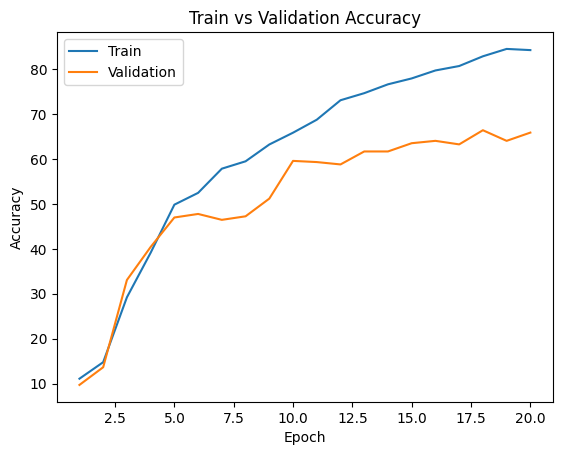

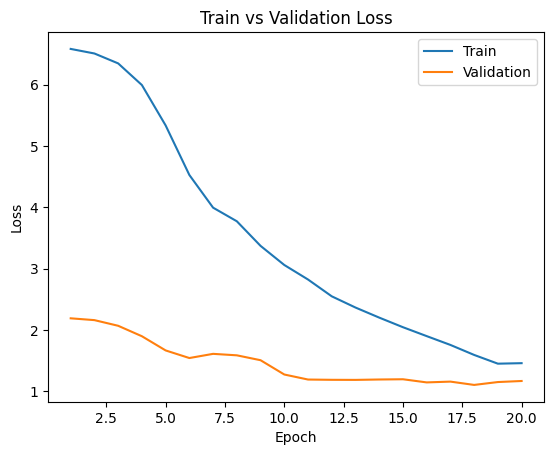

In [165]:
#plot
model_path = get_model_name(model.name, batch_size=512, learning_rate=0.01, epoch=19)
plot_training_curve(model_path)

Epoch 1: Train Accuracy: 19.36966513460276, Train loss: 12.722940683364868 |Validation Accuracy: 32.808398950131235, Validation loss: 1.8074303269386292
Epoch 2: Train Accuracy: 33.74917925147735, Train loss: 12.48051905632019 |Validation Accuracy: 36.48293963254593, Validation loss: 1.9698578715324402
Epoch 3: Train Accuracy: 41.62836506894288, Train loss: 11.661242961883545 |Validation Accuracy: 39.10761154855643, Validation loss: 1.642695128917694
Epoch 4: Train Accuracy: 47.86605384110309, Train loss: 11.20525074005127 |Validation Accuracy: 36.74540682414698, Validation loss: 1.9401046633720398
Epoch 5: Train Accuracy: 37.16349310571241, Train loss: 11.169698238372803 |Validation Accuracy: 50.13123359580052, Validation loss: 1.5329557061195374
Epoch 6: Train Accuracy: 61.26066973079448, Train loss: 7.165597319602966 |Validation Accuracy: 49.86876640419948, Validation loss: 1.6721787452697754
Epoch 7: Train Accuracy: 65.9881812212738, Train loss: 6.0653557777404785 |Validation Accur

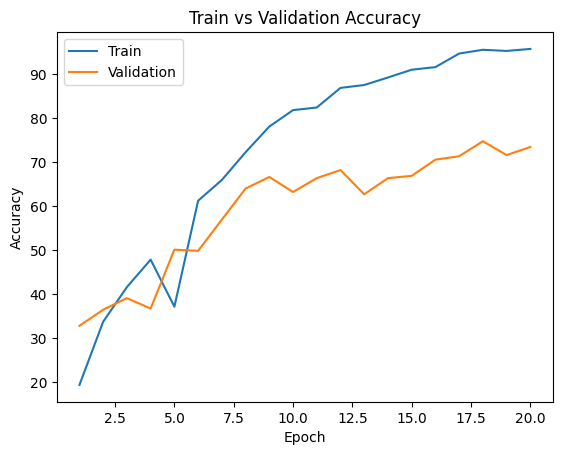

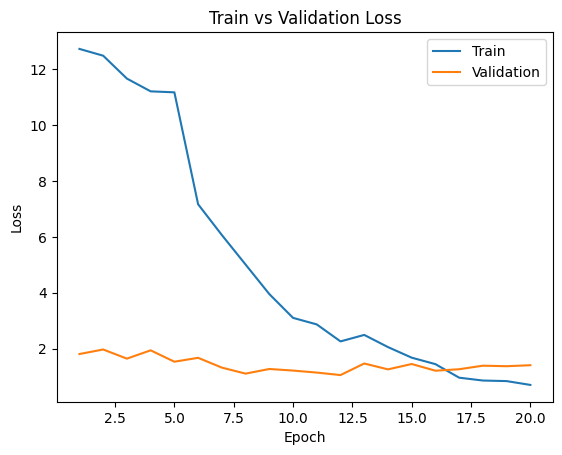

In [166]:
#the previous model was underfit but was gradually improving, lets see if we can get a little less underfit by dropping batch size and increasing learn rate slightly
#we don't want to add more epochs since train time is already pretty long

#perform tuning 3
model = GestureRecognitionModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset'
train_net(model,train_root,num_epochs=20, batch_size=256,learning_rate=0.05,momentum=0.9)

#plot
model_path = get_model_name(model.name, batch_size=256, learning_rate=0.05, epoch=19)
plot_training_curve(model_path)

Epoch 1: Train Accuracy: 29.612606697307946, Train loss: 46.15213692188263 |Validation Accuracy: 47.76902887139108, Validation loss: 1.588547945022583
Epoch 2: Train Accuracy: 58.96257386736704, Train loss: 29.368026316165924 |Validation Accuracy: 57.21784776902887, Validation loss: 1.2666291296482086
Epoch 3: Train Accuracy: 67.89231779382797, Train loss: 22.625665545463562 |Validation Accuracy: 59.05511811023622, Validation loss: 1.2172048290570576
Epoch 4: Train Accuracy: 74.98358502954694, Train loss: 18.29507976770401 |Validation Accuracy: 64.04199475065617, Validation loss: 1.0805960694948833
Epoch 5: Train Accuracy: 78.66053841103086, Train loss: 14.911717057228088 |Validation Accuracy: 65.09186351706036, Validation loss: 1.0562955439090729
Epoch 6: Train Accuracy: 83.05975049244911, Train loss: 12.024709194898605 |Validation Accuracy: 66.92913385826772, Validation loss: 1.0182486772537231
Epoch 7: Train Accuracy: 87.72160210111622, Train loss: 8.815110564231873 |Validation Accu

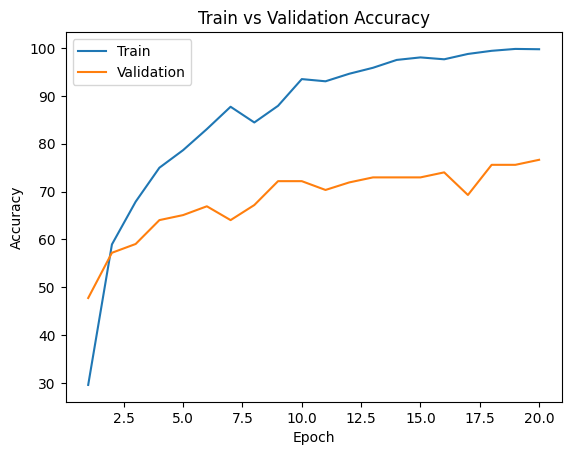

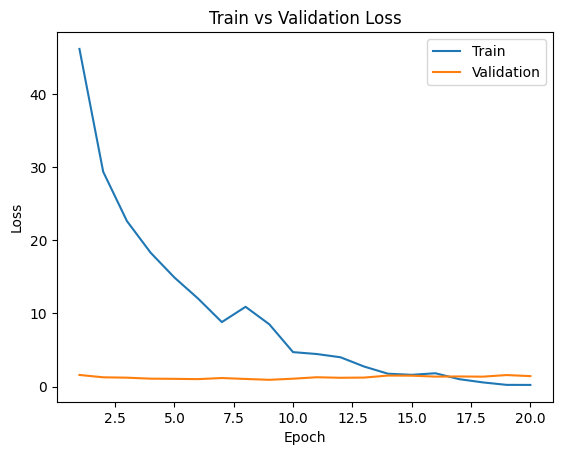

In [167]:
#perform tuning 4

#Lets take our best model thus far now and modify the dropout rate, reduce to 0.25
model = GestureRecognitionModel025()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset'
train_net(model,train_root,num_epochs=20, batch_size=64,learning_rate=0.01,momentum=0.9)


#plot
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.01, epoch=19)
plot_training_curve(model_path)

Epoch 1: Train Accuracy: 29.415627051871308, Train loss: 45.955520272254944 |Validation Accuracy: 48.818897637795274, Validation loss: 1.5861305991808574
Epoch 2: Train Accuracy: 59.02823374917925, Train loss: 29.205839812755585 |Validation Accuracy: 57.48031496062992, Validation loss: 1.2657850980758667
Epoch 3: Train Accuracy: 68.81155613919896, Train loss: 22.511803328990936 |Validation Accuracy: 57.74278215223097, Validation loss: 1.2029550472895305
Epoch 4: Train Accuracy: 74.91792514773473, Train loss: 18.260608732700348 |Validation Accuracy: 64.04199475065617, Validation loss: 1.0697843631108601
Epoch 5: Train Accuracy: 78.13525935653315, Train loss: 15.094313383102417 |Validation Accuracy: 65.35433070866142, Validation loss: 1.0793847342332203
Epoch 6: Train Accuracy: 82.53447143795141, Train loss: 11.90612119436264 |Validation Accuracy: 67.19160104986877, Validation loss: 0.9952546457449595
Epoch 7: Train Accuracy: 87.06500328299408, Train loss: 8.64019051194191 |Validation Ac

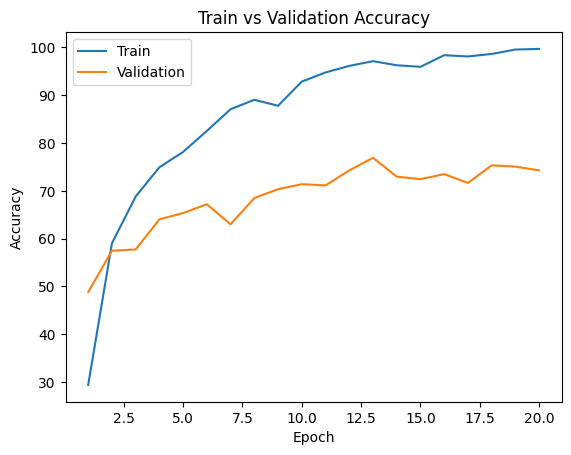

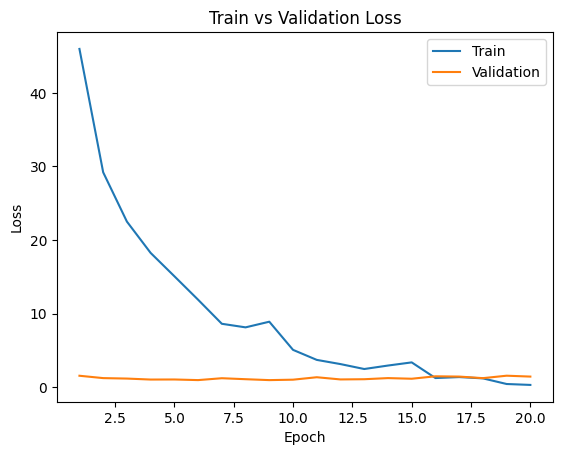

In [170]:
#perform tuning 5

#Reducing the dropout rate had a positive effect on our fit, lets try one more reduction to 0.15
model = GestureRecognitionModel015()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset'
train_net(model,train_root,num_epochs=20, batch_size=64,learning_rate=0.01,momentum=0.9)


#plot
model_path = get_model_name(model.name, batch_size=64, learning_rate=0.01, epoch=19)
plot_training_curve(model_path)

### Part B.3.c - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

In [ ]:
net = GestureRecognitionModel()
# Best result, had val accuracy of 78.7%
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=19)
state = torch.load(model_path)
net.load_state_dict(state)


In [5]:
#answer to B.3.c
print('''The tuning resulted in the best model being the one with a batch_size of 64, learning rate of 0.01, trained for 20 epochs, and with a dropout rate of 0.5. This model was selected as the best due to its superior performance in validation accuracy (inverse of val error) as well as train/val loss. This indicates that this set of hyperparameters is providing a good fit to the data (good performance on training set), and is also generalizing well to new data (good performance on validation set)''')


The tuning resulted in the best model being the one with a batch_size of 64, learning rate of 0.01, trained for 20 epochs, and with a dropout rate of 0.5. This model was selected as the best due to its superior performance on test accuracy (inverse of test error) as well as train/val loss. This indicates that this set of hyperparameters is providing a good fit to the data (good performance on training set), and is also generalizing well to new data (good performance on test set)


### Part B.3.d - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [176]:
#Function to return the test classification error
def evaluate2(net, loader):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    net.eval()
 
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        #labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        corr = (predicted != labels).sum().item()
        #corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr) #(corr.sum())
      
        total_epoch += len(labels)
    test_err = 100* float(total_err) / total_epoch

    print("Test error for network '{}' : {:.2f}%".format(net.name,test_err))
    
    return test_err/100

In [174]:
_,_, test_loader = load_data(batch_size=64)

In [177]:
evaluate2(net,test_loader)

Test error for network 'GestureR1' : 25.81%


0.25806451612903225

In [214]:
#comment on the above
print('COMMENT: This result is a comparatively decent score for exposure to unseen data, and has slightly more error than the score from the validation set, which was 78.7% accurate')

COMMENT: This result is a comparatively decent score for exposure to unseen data, and has slightly more error than the score from the validation set, which was 78.7% accurate


### Part B.4 Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part B.4.a - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [35]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [189]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
#train_features = alexnet.features(train_dataset)

In [45]:

def getFeaturesAndLabels(batch_size=64, test_root="C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\test"):
    # Load the AlexNet model with pre-trained weights
    #import torchvision.models
    model = torchvision.models.alexnet(pretrained=True)

    # Set the model in evaluation mode
    model.eval()

    # Load the training dataset
    #transform = transforms.Compose([transforms.ToTensor()])
    transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
   
    dataset = torchvision.datasets.ImageFolder(root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset', transform=transform)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Use DataLoader to load the data in batches
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False) #64 image per batch
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    #LOAD TEST
    #test_root="C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\test"
    # Load the test dataset using ImageFolder
    test_dataset = torchvision.datasets.ImageFolder(test_root, transform=transform)

    # Use DataLoader to load the data in batches
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Compute the training features and labels
    training_features = []
    training_labels = []
    for image, label in train_loader:
        features = model.features(image)
        features = features.view(features.size(0), -1)
        training_features.append(features)
        training_labels.append(label)

    training_features = torch.cat(training_features, dim=0)
    training_labels = torch.cat(training_labels, dim=0)

    #Compute the validation features and labels
    val_features = []
    val_labels = []
    for image, label in val_loader:
        features = model.features(image)
        features = features.view(features.size(0), -1)
        val_features.append(features)
        val_labels.append(label)

    val_features = torch.cat(val_features, dim=0)
    val_labels = torch.cat(val_labels, dim=0)


    #Compute test features and labels
    test_features = []
    test_labels = []
    for image, label in test_loader:
        features = model.features(image)
        features = features.view(features.size(0), -1)
        test_features.append(features)
        test_labels.append(label)

    test_features = torch.cat(test_features, dim=0)
    test_labels = torch.cat(test_labels, dim=0)


    return training_features,training_labels,val_features,val_labels,test_features,test_labels



In [233]:
training_features,training_labels,val_features,val_labels,test_features,test_labels = getFeaturesAndLabels(batch_size=64)

c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
torch.save(training_features, 'training_features')
torch.save(val_features, 'val_features')
torch.save(test_features, 'test_features')

### Part B.4.b - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [14]:

#feature classifier based on alexnet input
class FeatureClassifier(nn.Module):
    def __init__(self, num_classes=9):
        super(FeatureClassifier, self).__init__()
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.name = 'FeatureClassifier'
        
    def forward(self, x):
        # Flatten input features
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

print('''Choice of architecture: The model contains three fully connected layers, each with a ReLU activation function and a dropout layer.

Convolutional layers are not chosen here because the input to the model is features extracted from AlexNet, and we want to perform classification using these features. 

9 channels are used to correspond to the number of class labels.

The use of ReLU activation functions and dropout are to improve the model's ability to generalize to unseen data. The dropout layer randomly sets some of the activations to 0 during training, forcing the model to learn more robust features.
''')

Choice of architecture: The model contains three fully connected layers, each with a ReLU activation function and a dropout layer.

Convolutional layers are not chosen here because the input to the model is features extracted from AlexNet, and we want to perform classification using these features. 

9 channels are used to correspond to the number of class labels.

The use of ReLU activation functions and dropout are to improve the model's ability to generalize to unseen data. The dropout layer randomly sets some of the activations to 0 during training, forcing the model to learn more robust features.



In [15]:
# features = ... load precomputed alexnet.features(img) ...
model = FeatureClassifier()
#output = model(training_features)
#prob = F.softmax(output)

### Part B.4.c - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [26]:
#tensor = torch.from_numpy(tensor.detach().numpy())

def train_net2(model, train_features, train_labels, val_features, val_labels, batch_size, num_epochs, learning_rate):
    train_features = torch.from_numpy(train_features.detach().numpy())
    val_features = torch.from_numpy(val_features.detach().numpy())


# Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    train_error = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_error = np.zeros(num_epochs)
    vali_loss = np.zeros(num_epochs)
    start_time = time.time()
    # Train the network on the features
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_error = 0.0
        for i in range(0, train_features.shape[0], batch_size):
            inputs = train_features[i:i+batch_size]
            labels_batch = train_labels[i:i+batch_size]

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            running_error += (preds != labels_batch).sum().item()
        train_err = running_error / train_features.shape[0]
        tr_loss = running_loss / (train_features.shape[0] / batch_size)
        print(f'[Epoch {epoch + 1}] Training loss: {running_loss / (train_features.shape[0] / batch_size)} Training error: {train_err}')

        # Evaluate on the validation data
        with torch.no_grad():
            val_outputs = model(val_features)
            val_loss = criterion(val_outputs, val_labels)
            _, preds = torch.max(val_outputs, 1)
            val_err = (preds != val_labels).sum().item() / val_labels.size(0)
        print(f'[Epoch {epoch + 1}] Validation loss: {val_loss.item()} Validation error: {val_err}')

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        train_error[epoch] = train_err
        train_loss[epoch] = tr_loss
        val_error[epoch] = val_err
        vali_loss[epoch] = val_loss.item()
        # Write the train/test loss/err into CSV file for plotting later
        epochs = np.arange(1, num_epochs + 1)
        np.savetxt("{}_train_acc.csv".format(model_path), train_error)
        np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
        np.savetxt("{}_val_acc.csv".format(model_path), val_error)
        np.savetxt("{}_val_loss.csv".format(model_path), vali_loss)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

            
def plot_training_curve2(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_acc.csv".format(path))
    val_err = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


In [266]:
model = FeatureClassifier()
train_net2(model, training_features, training_labels, val_features, val_labels, batch_size=64, num_epochs=10, learning_rate=0.01)

[Epoch 1] Training loss: 1.5664231343560522 Training error: 0.5607353906762967
[Epoch 1] Validation loss: 0.9558407664299011 Validation error: 0.3753280839895013
[Epoch 2] Training loss: 0.6867823046598478 Training error: 0.2606697307944846
[Epoch 2] Validation loss: 0.5855054259300232 Validation error: 0.1994750656167979
[Epoch 3] Training loss: 0.3857801785534804 Training error: 0.13328956007879186
[Epoch 3] Validation loss: 0.6043157577514648 Validation error: 0.18110236220472442
[Epoch 4] Training loss: 0.3461120540345881 Training error: 0.11162179908076166
[Epoch 4] Validation loss: 0.6298194527626038 Validation error: 0.19160104986876642
[Epoch 5] Training loss: 0.42352335185340884 Training error: 0.12869336835193695
[Epoch 5] Validation loss: 0.7924489378929138 Validation error: 0.23097112860892388
[Epoch 6] Training loss: 0.2951977802434409 Training error: 0.0984898227183191
[Epoch 6] Validation loss: 0.3159838616847992 Validation error: 0.09448818897637795
[Epoch 7] Training l

In [269]:
#increase batch size
model = FeatureClassifier()
train_net2(model, training_features, training_labels, val_features, val_labels, batch_size=256, num_epochs=10, learning_rate=0.01)

[Epoch 1] Training loss: 2.1731066638047336 Training error: 0.757715036112935
[Epoch 1] Validation loss: 1.8470910787582397 Validation error: 0.49606299212598426
[Epoch 2] Training loss: 1.5815155369939573 Training error: 0.36769533814839134
[Epoch 2] Validation loss: 1.1967055797576904 Validation error: 0.2992125984251969
[Epoch 3] Training loss: 1.0034734834907717 Training error: 0.27905449770190416
[Epoch 3] Validation loss: 0.8367943167686462 Validation error: 0.2677165354330709
[Epoch 4] Training loss: 0.710641040664242 Training error: 0.23703217334208798
[Epoch 4] Validation loss: 0.6810337901115417 Validation error: 0.2152230971128609
[Epoch 5] Training loss: 0.5293686955051835 Training error: 0.17137229152987524
[Epoch 5] Validation loss: 0.5668815970420837 Validation error: 0.18110236220472442
[Epoch 6] Training loss: 0.3978635921966693 Training error: 0.13591595535128037
[Epoch 6] Validation loss: 0.44337528944015503 Validation error: 0.14960629921259844
[Epoch 7] Training lo

In [270]:
#decrease batch size
model = FeatureClassifier()
train_net2(model, training_features, training_labels, val_features, val_labels, batch_size=128, num_epochs=10, learning_rate=0.01)

[Epoch 1] Training loss: 1.9254307186454829 Training error: 0.6618516086671044
[Epoch 1] Validation loss: 1.2419962882995605 Validation error: 0.3648293963254593
[Epoch 2] Training loss: 0.9565262021160564 Training error: 0.30860144451739985
[Epoch 2] Validation loss: 0.7935082316398621 Validation error: 0.3123359580052493
[Epoch 3] Training loss: 0.569074752216502 Training error: 0.20551543007222586
[Epoch 3] Validation loss: 0.6772738099098206 Validation error: 0.23622047244094488
[Epoch 4] Training loss: 0.48324056463811405 Training error: 0.170059093893631
[Epoch 4] Validation loss: 0.5256093144416809 Validation error: 0.17585301837270342
[Epoch 5] Training loss: 0.28279477831414085 Training error: 0.08798424162836507
[Epoch 5] Validation loss: 0.3611258864402771 Validation error: 0.13648293963254593
[Epoch 6] Training loss: 0.1917410391533915 Training error: 0.05121470781352593
[Epoch 6] Validation loss: 0.35107821226119995 Validation error: 0.10498687664041995
[Epoch 7] Training 

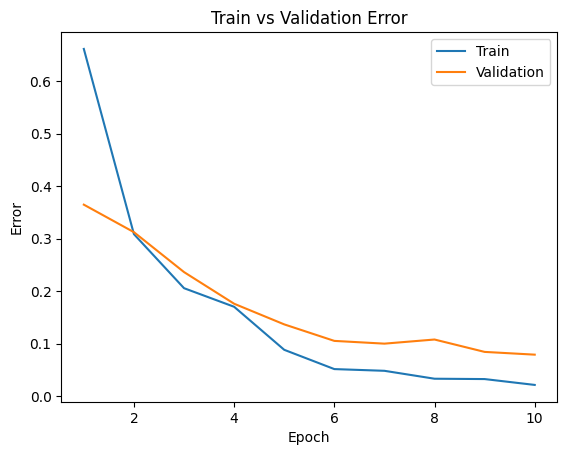

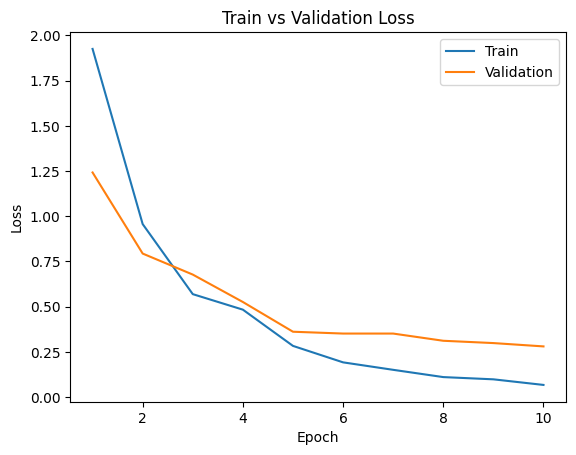

In [273]:
model_path = get_model_name(model.name, batch_size=128, learning_rate=0.01, epoch=9) #dropout 0.5
plot_training_curve2(model_path)

### Part B.4.d - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [59]:
#Modified function to return test features
from sklearn.metrics import classification_report
def evaluate3(model, test_features, test_labels):

    with torch.no_grad():
        outputs = model(test_features)
        criterion = nn.CrossEntropyLoss()
        loss = criterion(outputs, test_labels)
        _, preds = torch.max(outputs, 1)
        test_error = (preds != test_labels).sum().item() / test_labels.size(0)
    print("Test error for network '{}' : {:.2f}%".format(model.name,test_error*100))

    #use this next line to view performance by label, if necessary
    print(classification_report(test_labels, preds))
    return test_error


In [280]:
evaluate3(model,test_features,test_labels)

Test error for network 'FeatureClassifier' : 8.16%


0.08159392789373814

In [17]:
print('''We see a very low test error with the transfer learning model, of 8.16%, where in Part 3d, with no transfer learning, we had a test error of 25.81%. This indicates that transfer learning is a good option for this case. It is also worth noting that it took significantly less tuning and computation time to achieve this performance with the transfer learning model.''')

We see a very low test error with the transfer learning model, of 8.16%, where in Part 3d, with no transfer learning, we had a test error of 25.81%. This indicates that transfer learning is a good option for this case. It is also worth noting that it took significantly less tuning and computation time to achieve this performance with the transfer learning model.


### Part B.4.e - 5 pt
Compare the transfer learning strategy used in Part B.3 to a fine-tuning approach and analyze the trade-off between accuracy and computational cost for each approach. Discuss the pros and cons of both methods and explain why fine-tuning may be more suitable for certain tasks while transfer learning may be more suitable for others.

In your analysis, consider the following factors:

1. The number of layers in the pre-trained network and their relevance to the new task
2. The size of the new dataset and the similarity between the pre-trained network's task and the new task
3. The computational resources available for training
4. The time required to train the network from scratch versus fine-tuning a pre-trained network
5. The impact of regularization techniques on the fine-tuning process.

In [147]:
print('''NOTE: the analysis for the following section draws on the code results from Section B.3 and B.4''')

NOTE: the analysis for the following section draws on the code results from Section B.3 and B.4


In [24]:
print('''1: Transfer learning works well when the lower layers of the network contain relevant features for the new task, as they can be reused. However, if the new task is different from the pre-trained network's task, then fine-tuning may be more appropriate, as the entire network will need to be adapted to the new task. In our case, AlexNet was trained on over a million images and is intended for image classification, which coincides with our task here of classifying hand gesture images. This makes the pre-trained approach favorable and we see this in the pre-trained model's test error in section B.4 being much lower than the fine tuned model trained from scratch in B.3.

2: Transfer learning is more suitable with a smaller dataset, as it enables leveraging the knowledge from the larger pre-trained network's dataset. However, if the new dataset is large and the pre-trained network's task is similar to the new task, then fine-tuning may be more appropriate as it will allow the network to learn from both. In our case, the pre-trained model is favorable as our datasets in this lab are very small at about 2400 images. Thus the pre-trained approach allows us to leverage the knowledge of AlexNet which has been trained on over a million images. This may also have been a contributing factor to better test error in section B.4

3: Training a deep learning model from scratch requires a lot of computational resources and can take a long time. Fine-tuning a pre-trained network can be completed without the use of such heavy resources. 

4: Training a deep learning model from scratch can take a very long time, especially for large datasets. In contrast, fine-tuning a pre-trained network is much faster, as the network has already been trained on a large dataset. We see this in the previous sections where the pre-trained models (Section B.4) only took around 70 seconds to train on the new dataset, while the fine tuning approach in section B.3 took around 25 minutes to train on the dataset. This can be a great advantage as it allows us to train and iterate on our models much more frequently than if we had to train a fine-tuned model every time. 

5: Regularization techniques such as dropout and weight decay can also be used to help prevent overfitting when fine-tuning a pre-trained network or a network from scratch. They can also affect the performance of the network and must be used carefully. In general, transfer learning is less at risk of overfitting than training from scratch as pre-trained networks are trained on large datasets and provide a more general representation of the data. Training from scratch can suffer from overfit as you are training the model on a much more specific dataset. Regularization techniques can help prevent this. 

In conclusion, we see that transfer learning is more suitable when the new dataset is smaller, the computational resources are limited, and the pre-trained network's task is similar to the new task. Fine-tuning is more suitable when the new dataset is larger, the computational resources are abundant, and the pre-trained network's task is significantly different from the new task. Hence the task in this lab would seem to favor the use of pre-trained models, and this is backed up by the performance in section B.4 vs section B.3''')

1: Transfer learning works well when the lower layers of the network contain relevant features for the new task, as they can be reused. However, if the new task is different from the pre-trained network's task, then fine-tuning may be more appropriate, as the entire network will need to be adapted to the new task. In our case, AlexNet was trained on over a million images and is intended for image classification, which coincides with our task here of classifying hand gesture images. This makes the pre-trained approach favorable and we see this in the pre-trained model's test error in section B.4 being much lower than the fine tuned model trained from scratch in B.3.

2: Transfer learning is more suitable with a smaller dataset, as it enables leveraging the knowledge from the larger pre-trained network's dataset. However, if the new dataset is large and the pre-trained network's task is similar to the new task, then fine-tuning may be more appropriate as it will allow the network to lear

### Part B.5 Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part B.5.a - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [101]:

_,_,_,_,hg_features,hg_labels = getFeaturesAndLabels(batch_size=128, test_root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Gesture Images Resized')

c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Part B.5.b - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [103]:
evaluate3(model,hg_features,hg_labels)

Test error for network 'FeatureClassifier' : 3.70%
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



0.037037037037037035

In [104]:
print('''Our performance here is even better than that in Part 4.d (8.15%), here we have only 3.7% error rate on the test set. We must note that this test set is very small, only 27 images. This indicates that the model only made an error on one of the images, meaning it was perfect on all the hand gestures except for 1 sample. From the classification report we can see that the model failed on 1 sample of class 4 (letter E), incorrectly classifying it as class 0 (letter A). This is reasonable as these 2 particular gestures are very similar. It is possible for our model to perform better with the small generated test set due to random chance. When a small test set is used, there is a higher likelihood that the sample of data used for testing is not representative of the overall data distribution. This can lead to slightly misleading results. Our model was already shown to perform quite well at the task from the previous test set, so it is very possible that this very small generated test set coincidentally contained data that was easier for this model to classify.

Another possibility is that my generated images were not diverse enough. I referenced the training set when creating my images, and did not include any data augmentation such as rotations. This made my generated test set very similar to the training set, which was already well fit to the model. With such a small sample size it then resulted in a very low test error. 

Therefore, while this low test error on a small test set is a good sign, it would be misleading to claim that my model is nearly perfect at classifying different hand gestures. We would need to generate a much larger dataset, and with more variations and hands in the images before we can reach a conclusion.''')

Our performance here is even better than that in Part 4.d (8.15%), here we have only 3.7% error rate on the test set. We must note that this test set is very small, only 27 images. This indicates that the model only made an error on one of the images, meaning it was perfect on all the hand gestures except for 1 sample. From the classification report we can see that the model failed on 1 sample of class 4 (letter E), incorrectly classifying it as class 0 (letter A). This is reasonable as these 2 particular gestures are very similar. It is possible for our model to perform better with the small generated test set due to random chance. When a small test set is used, there is a higher likelihood that the sample of data used for testing is not representative of the overall data distribution. This can lead to slightly misleading results. Our model was already shown to perform quite well at the task from the previous test set, so it is very possible that this very small generated test set coi

### Part B.6 Trade-off Between Accuracy and Computational Cost [16 pt]
We will now examine the trade-off between accuracy and computational cost for different transfer learning strategies.

### Part B.6.a -  4 pt
Compare the accuracy and computational cost of fine-tuning only the last fully connected layer of a pre-trained model versus fine-tuning multiple layers of a pre-trained model. How does the trade-off between accuracy and computational cost change with the number of fine-tuned layers?

In [107]:
#We have multiple FC layers in B.4, here lets create a new model with 1 FC layer
class NewFeatureClassifier(nn.Module):
    def __init__(self, num_classes=9):
        super(NewFeatureClassifier, self).__init__()
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        #self.fc2 = nn.Linear(4096, 4096)
        #self.fc3 = nn.Linear(4096, num_classes)
        #self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(p=0.5)
        self.name = 'NewFeatureClassifier'
        
    def forward(self, x):
        # Flatten input features
        x = x.view(x.size(0), -1)
        # Pass the input through
        x = self.fc1(x)
        #x = self.relu(x)
        #x = self.dropout(x)
        #x = self.fc2(x)
        #x = self.relu(x)
        #x = self.dropout(x)
        #x = self.fc3(x)
        
        return x

In [117]:
#train model
model = NewFeatureClassifier()
train_net2(model, training_features, training_labels, val_features, val_labels, batch_size=128, num_epochs=10, learning_rate=0.01)

[Epoch 1] Training loss: 3.7295092997860926 Training error: 0.5128036769533815
[Epoch 1] Validation loss: 2.260667562484741 Validation error: 0.31758530183727035
[Epoch 2] Training loss: 1.1849745551927733 Training error: 0.1917268548916612
[Epoch 2] Validation loss: 1.7706516981124878 Validation error: 0.1784776902887139
[Epoch 3] Training loss: 0.5686325742003954 Training error: 0.0912672357189757
[Epoch 3] Validation loss: 0.6167577505111694 Validation error: 0.09711286089238845
[Epoch 4] Training loss: 0.2562619482930835 Training error: 0.05252790544977019
[Epoch 4] Validation loss: 0.6413435935974121 Validation error: 0.10236220472440945
[Epoch 5] Training loss: 0.1934438731743956 Training error: 0.04530531845042679
[Epoch 5] Validation loss: 0.6465728282928467 Validation error: 0.11023622047244094
[Epoch 6] Training loss: 0.09915800620596893 Training error: 0.026920551543007223
[Epoch 6] Validation loss: 0.5324525833129883 Validation error: 0.08661417322834646
[Epoch 7] Training 

In [118]:
#eval on test set
evaluate3(model,test_features,test_labels)

Test error for network 'NewFeatureClassifier' : 9.68%
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        59
           1       0.98      0.97      0.97        60
           2       0.95      0.92      0.93        60
           3       0.89      0.97      0.93        60
           4       0.72      1.00      0.84        60
           5       0.98      0.85      0.91        60
           6       0.98      0.75      0.85        60
           7       0.86      0.95      0.90        60
           8       0.89      0.98      0.93        48

    accuracy                           0.90       527
   macro avg       0.92      0.90      0.90       527
weighted avg       0.92      0.90      0.90       527



0.0967741935483871

In [134]:
#eval on hand generated set
evaluate3(model,hg_features,hg_labels)

Test error for network 'NewFeatureClassifier' : 3.70%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



0.037037037037037035

In [138]:
print('''Only having one fully connected layer results in slightly worse performance on the test set, and equal performance on the small generated set. Fine-tuning only the last fully connected layer of a pre-trained model requires less computational resources than fine-tuning multiple layers. However, as we see, fine-tuning multiple layers of a pre-trained model is likely to result in a higher accuracy.

As the number of fine-tuned layers increases, we expect the accuracy of the model will continue to improve, but the computational cost will also increase.

This trade-off means that the number of fine-tuned layers should depend on the desired trade-off between accuracy and computational cost for the given use case. In some cases, based on the desired accuracy, fine-tuning only the last fully connected layer may be sufficient, while in others fine-tuning multiple layers are necessary to achieve the desired accuracy.''')



Only having one fully connected layer results in slightly worse performance on the test set, and equal performance on the small generated set. Fine-tuning only the last fully connected layer of a pre-trained model requires less computational resources than fine-tuning multiple layers. However, as we see, fine-tuning multiple layers of a pre-trained model is likely to result in a higher accuracy.

As the number of fine-tuned layers increases, we expect the accuracy of the model will continue to improve, but the computational cost will also increase.

This trade-off means that the number of fine-tuned layers should depend on the desired trade-off between accuracy and computational cost for the given use case. In some cases, based on the desired accuracy, fine-tuning only the last fully connected layer may be sufficient, while in others fine-tuning multiple layers are necessary to achieve the desired accuracy.


### Part B.6.b -  4 pt
Analyze the trade-off between accuracy and computational cost for transfer learning with a pre-trained model versus training a model from scratch. What factors contribute to this trade-off and how does the choice between these two strategies depend on the size of the dataset and the amount of computational resources available?

In [137]:
print('''As discussed in B.4.e, transfer learning with a pre-trained model and training a model from scratch has trade-offs between accuracy and computational cost.

When using a pre-trained model, the initial weights of the model have already been optimized on a very large dataset, so the model requires less training to achieve good accuracy on a new task. This makes transfer learning a computationally efficient strategy, especially when the size of the new dataset is small. However, the accuracy of the model may be limited by the pre-trained weights, and fine-tuning the model to the new task may still require a significant amount of computational resources.

On the other hand, training a model from scratch can lead to higher accuracy, since the model is optimized specifically for the new task. However, this approach requires a much larger amount of computational resources, especially when the size of the dataset is large. The model must be trained for many iterations to achieve good accuracy, and overfitting can be a concern.

The choice between these two strategies depends on the size of the dataset and the amount of computational resources available. If the size of the dataset is small and computational resources are limited, transfer learning with a pre-trained model may be a good choice. If the size of the dataset is large and computational resources are abundant, training a model from scratch may be a better choice.

If the task is similar to the task for which the pre-trained model was optimized, transfer learning may lead to good results with limited computational resources. On the other hand, if the task is significantly different or there is domain-specific knowledge that can be leveraged, training a model from scratch may be the better choice.

Looking specifically at our case, with the task of classifying hand gesture images, the pre-trained model provided both reduced computational cost and better accuracy. This is because all the conditions discussed above that favor transfer learning were true. We did indeed have a small dataset of only about 2400 images. We also were using the AlexNet network, which was trained on a million images and intended for image classification, a task which coincides with ours, making transfer learning applicable. We also had limited compute resources, working from my local machine. These factors influenced the results. The typical pre-trained model took about 70 seconds to train, where as the typical model trained from scratch took about 25 minutes to train. This allowed me to rapidly iterate on my tuning parameters and ultimately achieve significantly better performance in test error, at a much lower computational cost.''')

As discussed in B.4.e, transfer learning with a pre-trained model and training a model from scratch has trade-offs between accuracy and computational cost.

When using a pre-trained model, the initial weights of the model have already been optimized on a very large dataset, so the model requires less training to achieve good accuracy on a new task. This makes transfer learning a computationally efficient strategy, especially when the size of the new dataset is small. However, the accuracy of the model may be limited by the pre-trained weights, and fine-tuning the model to the new task may still require a significant amount of computational resources.

On the other hand, training a model from scratch can lead to higher accuracy, since the model is optimized specifically for the new task. However, this approach requires a much larger amount of computational resources, especially when the size of the dataset is large. The model must be trained for many iterations to achieve good accuracy,

### Part B.6.c -  4 pt
Investigate the impact of freezing some of the layers in a pre-trained model during fine-tuning. How does the trade-off between accuracy and computational cost change with the number of frozen layers and how does this impact overall performance?

In [296]:
#modify code to freeze some layers during training
class FeatureClassifierFreeze(nn.Module):
    def __init__(self, num_classes=10, freeze_layers=True):
        super(FeatureClassifierFreeze, self).__init__()
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(p=0.5)
        self.name = 'FeatureClassifierFreeze'
        
        self.freeze_layers = freeze_layers
        
        if self.freeze_layers:
            # Freeze the weights of the first two layers
            self.fc1.requires_grad = False
            self.fc2.requires_grad = False
        
    def forward(self, x):
        # Flatten the input features
        x = x.view(x.size(0), -1)
        
        # Pass the input through the fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        if self.freeze_layers:
            # Freeze the weights of the first two layers
            x = x.detach()
            
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x


In [298]:
model = FeatureClassifierFreeze()
train_net2(model, training_features, training_labels, val_features, val_labels, batch_size=128, num_epochs=20, learning_rate=0.01)

[Epoch 1] Training loss: 2.1116738873567535 Training error: 0.7426132632961261
[Epoch 1] Validation loss: 1.7793055772781372 Validation error: 0.5459317585301837
[Epoch 2] Training loss: 1.5058912551489145 Training error: 0.43795141168745894
[Epoch 2] Validation loss: 1.2374804019927979 Validation error: 0.4251968503937008
[Epoch 3] Training loss: 1.0274120588797295 Training error: 0.31779382797110967
[Epoch 3] Validation loss: 0.8952343463897705 Validation error: 0.31496062992125984
[Epoch 4] Training loss: 0.74739115784533 Training error: 0.22849638870650033
[Epoch 4] Validation loss: 0.706081211566925 Validation error: 0.22572178477690288
[Epoch 5] Training loss: 0.5986727202948346 Training error: 0.1845042678923178
[Epoch 5] Validation loss: 0.5690919756889343 Validation error: 0.1784776902887139
[Epoch 6] Training loss: 0.5045425855870789 Training error: 0.15758371634931057
[Epoch 6] Validation loss: 0.5506649613380432 Validation error: 0.18635170603674542
[Epoch 7] Training loss:

In [299]:
evaluate3(model,hg_features,hg_labels)

Test error for network 'FeatureClassifierFreeze' : 11.11%


0.1111111111111111

In [300]:
evaluate3(model,test_features,test_labels)

Test error for network 'FeatureClassifierFreeze' : 12.52%


0.1252371916508539

In [146]:

print('''When a layer is frozen during fine-tuning, the weights of that layer are not updated during training, so the layer keeps the pre-trained weights. This can help to reduce the risk of overfitting, since the frozen layer is a regularizer. 

Since this method is intended to reduce overfitting, in the above code we freeze the first 2 layers in the FeatureClassiferNetwork from section B.4.b and compare the results to the original network. We see that we are not fitting quite as well on the training data, with a slightly higher training error (0.068 vs 0.021), which is in line with our expectation since we reduced the fit by freezing some layers. The validation error is also higher (0.12 vs 0.078). Consequently, the result is that the test error is also higher on both the test set and the hand generated set.

While there was not much difference in training time here, we know that freezing some layers requires less computational resources, since the gradients for the frozen layer do not need to be computed during backpropagation. This leads to a trade-off, where freezing layers can give increased computational efficiency and less overfitting, but likely at the cost of model accuracy. One must be careful not to freeze too many layers as it can limit the ability of the model to learn task-specific features.

In general, freezing a few layers can have a positive impact on performance, while freezing too many layers can lead to decreased accuracy. The optimal number of frozen layers needs to be tuned to balance the trade-off.''')

When a layer is frozen during fine-tuning, the weights of that layer are not updated during training, so the layer keeps the pre-trained weights. This can help to reduce the risk of overfitting, since the frozen layer is a regularizer. 

Since this method is intended to reduce overfitting, in the above code we freeze the first 2 layers in the FeatureClassiferNetwork from section B.4.b and compare the results to the original network. We see that we are not fitting quite as well on the training data, with a slightly higher training error (0.068 vs 0.021), which is in line with our expectation since we reduced the fit by freezing some layers. The validation error is also higher (0.12 vs 0.078). Consequently, the result is that the test error is also higher on both the test set and the hand generated set.

While there was not much difference in training time here, we know that freezing some layers requires less computational resources, since the gradients for the frozen layer do not need t

### Part B.6.d -  4 pt
Evaluate the trade-off between accuracy and computational cost for transfer learning using a pre-trained model with a similar architecture versus using a pre-trained model with a different architecture. How does this trade-off change with the similarity of the architectures and what impact does this have on the overall performance of the model?

In [148]:
print('''In the previous section we used the pre-trained AlexNet model as a base to classify our hand gestures. AlexNet was used as it has a similar architecture to the relative to the base model it was applied to. In this section we will analyze what happens when using a pre-trained model with a different architecture. The pre-trained model we will choose is ResNet. In terms of architecture, AlexNet is very shallow, and has five convolutional layers, max-pooling layers, and three fully connected layers. ResNet, on the other hand, has a much deeper architecture, with over 100 layers. ResNet uses blocks to build a very deep network. Thus, we can see that ResNet has quite a different architecture to the previously used AlexNet. We will now train and evaluate the ResNet model to compare its performance to that of AlexNet in section B.4.''')

In the previous section we used the pre-trained AlexNet model as a base to classify our hand gestures. AlexNet was used as it has a similar architecture to the relative to the base model it was applied to. In this section we will analyze what happens when using a pre-trained model with a different architecture. The pre-trained model we will choose is ResNet. In terms of architecture, AlexNet is very shallow, and has five convolutional layers, max-pooling layers, and three fully connected layers. ResNet, on the other hand, has a much deeper architecture, with over 100 layers. ResNet uses blocks to build a very deep network. Thus, we can see that ResNet has quite a different architecture to the previously used AlexNet. We will now train and evaluate the ResNet model to compare its performance to that of AlexNet in section B.4.


In [170]:
#new loader function to get ResNet features

def getFeaturesAndLabelsRN(batch_size=64, test_root="C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\test"):
    # Load the AlexNet model with pre-trained weights
    #import torchvision.models
    model = torchvision.models.resnet18(pretrained=True)

    # Set the model in evaluation mode
    model.eval()

    # Load the training dataset
    #transform = transforms.Compose([transforms.ToTensor()])
    transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
   
    dataset = torchvision.datasets.ImageFolder(root='C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\Lab_3b_Gesture_Dataset', transform=transform)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    # Use DataLoader to load the data in batches
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False) #64 image per batch
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    #LOAD TEST
    #test_root="C:\\Users\\alvipane\\Desktop\\Machine Learning\\1517\\Lab\\2\\Lab_2_Hand_Gesture_Dataset\\test"
    # Load the test dataset using ImageFolder
    test_dataset = torchvision.datasets.ImageFolder(test_root, transform=transform)

    # Use DataLoader to load the data in batches
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Compute the training features and labels
    # Get the feature extraction layers
    features = nn.Sequential(*list(model.children())[:-1])




    training_features = []
    training_labels = []
    for image, label in train_loader:

        with torch.no_grad():
            features_batch = features(image)
        #features = model.features(image)
        features_batch = features_batch.view(features_batch.size(0), -1)
        training_features.append(features_batch)
        training_labels.append(label)

    training_features = torch.cat(training_features, dim=0)
    training_labels = torch.cat(training_labels, dim=0)

    #Compute the validation features and labels
    val_features = []
    val_labels = []
    for image, label in val_loader:
        with torch.no_grad():
            features_batch = features(image)
        #features = model.features(image)
        features_batch = features_batch.view(features_batch.size(0), -1)
        val_features.append(features_batch)
        val_labels.append(label)

    val_features = torch.cat(val_features, dim=0)
    val_labels = torch.cat(val_labels, dim=0)


    #Compute test features and labels
    test_features = []
    test_labels = []
    for image, label in test_loader:
        with torch.no_grad():
            features_batch = features(image)
        #features = model.features(image)
        features_batch = features_batch.view(features_batch.size(0), -1)
        test_features.append(features_batch)
        test_labels.append(label)

    test_features = torch.cat(test_features, dim=0)
    test_labels = torch.cat(test_labels, dim=0)


    return training_features,training_labels,val_features,val_labels,test_features,test_labels

In [171]:
training_featuresRN,training_labelsRN,val_featuresRN,val_labelsRN,test_featuresRN,test_labelsRN = getFeaturesAndLabelsRN(batch_size=128)

c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alvipane\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [177]:
#augment FeatureClassifier to work with ResNet

class FeatureClassifierRN(nn.Module):
    def __init__(self, num_classes=9):
        super(FeatureClassifierRN, self).__init__()

        # Load ResNet feature extractor
        #resnet = torchivision.models.resnet18(pretrained=True)
        #self.features = nn.Sequential(*list(resnet.children())[:-1])

        # Add classifier layers
        self.fc1 = nn.Linear(512, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.name = 'FeatureClassifierRN'

    def forward(self, x):
        # Extract features using ResNet
        #x = self.features(x)
        x = x.view(x.size(0), -1)

        # Apply classifier layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)

        return x


In [182]:
#tune the feature classifier
model = FeatureClassifierRN()
train_net2(model, training_featuresRN, training_labelsRN, val_featuresRN, val_labelsRN, batch_size=256, num_epochs=20, learning_rate=0.05)

[Epoch 1] Training loss: 2.1146998064187663 Training error: 0.7957977675640184
[Epoch 1] Validation loss: 1.8580163717269897 Validation error: 0.6929133858267716
[Epoch 2] Training loss: 1.5581243042873851 Training error: 0.5699277741300066
[Epoch 2] Validation loss: 1.2389013767242432 Validation error: 0.49343832020997375
[Epoch 3] Training loss: 1.105812047706649 Training error: 0.42678923177938277
[Epoch 3] Validation loss: 1.151777744293213 Validation error: 0.4251968503937008
[Epoch 4] Training loss: 0.8525244549396237 Training error: 0.3099146421536441
[Epoch 4] Validation loss: 0.7097571492195129 Validation error: 0.25984251968503935
[Epoch 5] Training loss: 0.6115234735680503 Training error: 0.23177938279711097
[Epoch 5] Validation loss: 0.6003667116165161 Validation error: 0.2204724409448819
[Epoch 6] Training loss: 0.5383378377652684 Training error: 0.19960604070912671
[Epoch 6] Validation loss: 0.556739091873169 Validation error: 0.18635170603674542
[Epoch 7] Training loss: 

In [199]:
#training_featuresRN,training_labelsRN,val_featuresRN,val_labelsRN,test_featuresRN,test_labelsRN = getFeaturesAndLabelsRN(batch_size=32)
model = FeatureClassifierRN()
train_net2(model, training_featuresRN, training_labelsRN, val_featuresRN, val_labelsRN, batch_size=32, num_epochs=20, learning_rate=0.008)

[Epoch 1] Training loss: 1.771822247470748 Training error: 0.6579120157583717
[Epoch 1] Validation loss: 1.131075143814087 Validation error: 0.4566929133858268
[Epoch 2] Training loss: 0.9258214639975535 Training error: 0.34077478660538413
[Epoch 2] Validation loss: 0.7883837223052979 Validation error: 0.30708661417322836
[Epoch 3] Training loss: 0.6934025038721056 Training error: 0.25147734734077476
[Epoch 3] Validation loss: 0.700819194316864 Validation error: 0.25196850393700787
[Epoch 4] Training loss: 0.6187325284736217 Training error: 0.21470781352593565
[Epoch 4] Validation loss: 0.7170971035957336 Validation error: 0.28346456692913385
[Epoch 5] Training loss: 0.6030988837259034 Training error: 0.21208141825344715
[Epoch 5] Validation loss: 0.6991753578186035 Validation error: 0.25984251968503935
[Epoch 6] Training loss: 0.5091456509074802 Training error: 0.18122127380170716
[Epoch 6] Validation loss: 0.5953387022018433 Validation error: 0.22572178477690288
[Epoch 7] Training lo

In [185]:
model = FeatureClassifierRN()
train_net2(model, training_featuresRN, training_labelsRN, val_featuresRN, val_labelsRN, batch_size=128, num_epochs=30, learning_rate=0.005)

[Epoch 1] Training loss: 2.185886215240018 Training error: 0.8516086671043992
[Epoch 1] Validation loss: 2.0489437580108643 Validation error: 0.7217847769028871
[Epoch 2] Training loss: 1.9447720603416878 Training error: 0.6007879185817465
[Epoch 2] Validation loss: 1.7729930877685547 Validation error: 0.5144356955380578
[Epoch 3] Training loss: 1.6433510733370866 Training error: 0.47340774786605383
[Epoch 3] Validation loss: 1.4432474374771118 Validation error: 0.4041994750656168
[Epoch 4] Training loss: 1.3383959283659665 Training error: 0.40380827314510837
[Epoch 4] Validation loss: 1.216779112815857 Validation error: 0.3858267716535433
[Epoch 5] Training loss: 1.1275569793039923 Training error: 0.3604727511490479
[Epoch 5] Validation loss: 1.0845685005187988 Validation error: 0.3858267716535433
[Epoch 6] Training loss: 0.9746771628967806 Training error: 0.3230466185160867
[Epoch 6] Validation loss: 0.9474554657936096 Validation error: 0.34120734908136485
[Epoch 7] Training loss: 0.

In [196]:
#eval the best model on test set
evaluate3(model,test_featuresRN,test_labelsRN)

Test error for network 'FeatureClassifierRN' : 13.66%
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        59
           1       0.90      0.93      0.92        60
           2       0.86      0.95      0.90        60
           3       0.90      0.75      0.82        60
           4       0.87      0.97      0.91        60
           5       0.90      0.73      0.81        60
           6       0.81      0.93      0.87        60
           7       0.92      0.77      0.84        60
           8       0.70      0.92      0.79        48

    accuracy                           0.86       527
   macro avg       0.87      0.86      0.86       527
weighted avg       0.87      0.86      0.86       527



0.1366223908918406

In [207]:
print('''When comparing the similar network (Alexnet) to the different network (ResNet), there are a few things we can immediately notice. First, it's important to note that ResNet is generally a deeper and more complex architecture than AlexNet, which means that it will likely require more computational resources to train and may take longer to converge. We see this in the above code, where training times were up to 130s, nearly double that of the AlexNet network (60-70s). This is in line with our expectations, since AlexNet is a relatively shallow architecture that can be trained with less computational resources.

Given the differences in architecture, with ResNet being much deeper, we would have anticipated that it would have a better performance than AlexNet, but we see a higher test error of 0.1366, compared to 0.0816 with AlexNet, despite several attempts at tuning. This goes against what we would expect, since in the literature ResNet has been shown to perform better than AlexNet on many image classification tasks, particularly on very deep networks. This would seem to perhaps indicate that the depth of the ResNet network is not well suited to the problem of classifying hand gesture images, particularly with the small datasets we are working with here. 

In general, the type of tradeoff I would expect to see in this situation, is that ResNet, if better tuned, might be capable of increasing the model performance, but at the cost of significantly greater computational resources and time. AlexNet, on the other hand can provide good performance at minimal cost to computational resources. The decision for which route to choose will depend on the desired accuracy and computational resources available. 

Model architectures can vary greatly, and so we would also expect this tradeoff to change as the similarity of architectures change. ResNet and AlexNet are very different in terms of their architecture, but using architectures that are more similar in nature would allow us to find some sort of middle ground between the 2 tradeoff extremes. In this way, we can essentially tune the performance of our model and the computational resources used (between 2 extremes) by changing the architecture to be more or less similar to the baseline. 

''')

When comparing the similar network (Alexnet) to the different network (ResNet), there are a few things we can immediately notice. First, it's important to note that ResNet is generally a deeper and more complex architecture than AlexNet, which means that it will likely require more computational resources to train and may take longer to converge. We see this in the above code, where training times were up to 130s, nearly double that of the AlexNet network (60-70s). This is in line with our expectations, since AlexNet is a relatively shallow architecture that can be trained with less computational resources.

Given the differences in architecture, with ResNet being much deeper, we would have anticipated that it would have a better performance than AlexNet, but we see a higher test error of 0.1366, compared to 0.0816 with AlexNet, despite several attempts at tuning. This goes against what we would expect, since in the literature ResNet has been shown to perform better than AlexNet on man

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [208]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

UsageError: Cell magic `%%shell` not found.


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus